In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# The computational results are plotted against analytic results at $k=l=0$

The green curves indicate $\dot\gamma$ and $a$ values where $\text{Re}(\sigma)=0$ (oscillatory). The blue dashed curve indicate where $\sigma = 0$ (non-oscillatory).

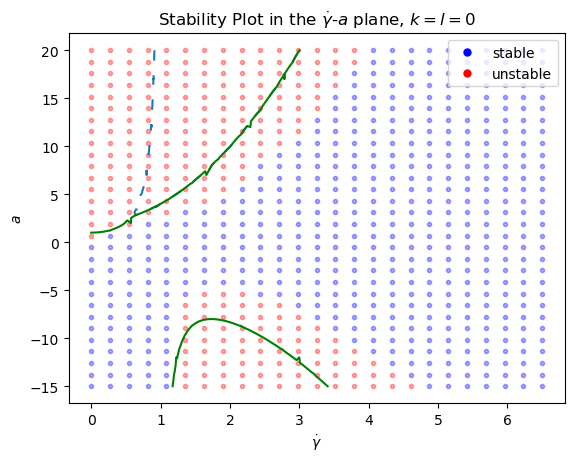

In [3]:
# load in computational results from Alex's code 
ev = np.loadtxt("data/ev-data-1", delimiter=',')
gd = np.loadtxt("data/gdv-1", delimiter=',')
a = np.loadtxt("data/av-1", delimiter=',')
n,m = len(gd), len(gd[0])

# plot the computational results
for i in range(n):
    for j in range(m):
        c = "red" if ev[i][j] > 0 else "blue"
        plt.plot(gd[i][j],a[i][j],".",color=c, picker=True, alpha=0.34)
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')

# import data from mathematica calculations 
adfile = open("data/analytic-data.dat")
count = 0
for row in adfile:
    pts = row.split("\t")
    xs = np.zeros(len(pts))
    ys = np.zeros(len(pts))
    for i in range(len(pts)):
        pt = pts[i]
        nums = pt[1:-2].split(",")
        xs[i] = nums[0]
        ys[i] = nums[1]
    # plot the analytic results against the computational results
    if count == 0:
        plt.plot(xs,ys,'--', dashes=(5,7))
    else:
        plt.plot(xs,ys,c='g')
    count += 1

# make the plot
plt.title("Stability Plot in the $\dot\gamma$-$a$ plane, $k=l=0$")
plt.legend(handles=[blue_dot, red_dot], loc='upper right')
plt.show()

The grid points in the background are computational results using Alex's code, which is contrasted with the analytic solution when $k=l=0$. Then blue dashed curve indicates when $\sigma = 0$, as opposed to $\text{Re}(\sigma)=0$, which carries an oscillatory mode with it. 